In [1]:
!pip3 install pandas as pd
!pip3 install numpy as np
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scipy

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import matplotlib as plt
import numpy as np
import pandas as pd

In [101]:
df = pd.read_csv("./최종데이터.csv")
df

,ORD_DT,ORD_NO,ORD_DTL_STAT,CUST_NO,SEX_GB,GRADE,AGE,GOODS_CD,GOODS_NUM,"SUBSTR(GOODS_NUM,6,2)",AMT,PLAN_DTL_SQ
0,2022-06-03 16:25:39,100596886,G013_99,446047,F,GOLD,50.0,421A1SV154_WH,421A1SV154,SV,250600,NaN
1,2022-06-03 16:33:16,100596896,G013_00,345737,NaN,SILVER,NaN,112B1PT901_WH,112B1PT901,PT,138600,NaN
2,2022-06-03 16:47:40,100596911,G013_60,279496,F,GOLD,41.0,521A2TO061_KH,521A2TO061,TO,138600,NaN
3,2022-06-03 16:47:40,100596911,G013_99,279496,F,GOLD,41.0,431A5CP622_WH,431A5CP622,CP,62400,NaN
4,2022-06-03 16:47:40,100596911,G013_60,279496,F,GOLD,41.0,522B2TS951_BK,522B2TS951,TS,124600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
831445,2023-06-24 14:21:02,101158088,G013_00,436352,F,SILVER,54.0,521B5SC757_WH,521B5SC757,SC,26600,NaN
831446,2023-06-24 14:21:02,101158088,G013_00,436352,F,SILVER,54.0,421C1SC753_PK,421C1SC753,SC,28000,NaN
831447,2023-06-24 14:21:02,101158088,G013_00,436352,F,SILVER,54.0,CRS0000006514,C21FAS103IV,S1,26000,NaN
831448,2023-06-24 14:31:10,101158094,G013_00,536021,F,SILVER,62.0,121B1PC455_BK,121B1PC455,PC,59000,NaN


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831450 entries, 0 to 831449
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ORD_DT                 831450 non-null  object 
 1   ORD_NO                 831450 non-null  int64  
 2   ORD_DTL_STAT           831450 non-null  object 
 3   CUST_NO                831450 non-null  int64  
 4   SEX_GB                 655223 non-null  object 
 5   GRADE                  831450 non-null  object 
 6   AGE                    663108 non-null  float64
 7   GOODS_CD               831450 non-null  object 
 8   GOODS_NUM              831450 non-null  object 
 9   SUBSTR(GOODS_NUM,6,2)  830391 non-null  object 
 10  AMT                    831450 non-null  int64  
 11  PLAN_DTL_SQ            62648 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 76.1+ MB


In [103]:
df= df.astype({'PLAN_DTL_SQ':'int'})

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer: Error while type casting for column 'PLAN_DTL_SQ'

In [104]:
plan =  pd.read_csv("./plan_dt.csv")
plan

,PLAN_SQ,PLAN_DTL_SQ
0,6,1
1,21,2
2,21,3
3,21,4
4,21,5
...,...,...
2024,3553,7999
2025,3553,8000
2026,3553,8001
2027,3553,8002


In [105]:
plan_1 = pd.read_csv("./기획전.csv")
plan_1

,기획전번호,상품갯수,주문횟수,주문량,퍼블리싱여부
0,21,33,4,4,NaN
1,23,172,3,3,NaN
2,24,545,6,6,NaN
3,25,199,4,4,NaN
4,26,269,6,6,NaN
...,...,...,...,...,...
321,3433,58,2,2,NaN
322,3451,528,30,30,NaN
323,3492,545,18,18,NaN
324,3514,1152,211,211,NaN


In [106]:
plan_dt = pd.merge(plan, plan_1['퍼블리싱여부'], left_on='PLAN_SQ', right_on=plan_1['기획전번호'], how='left')
plan_dt

,PLAN_SQ,PLAN_DTL_SQ,퍼블리싱여부
0,6,1,NaN
1,21,2,NaN
2,21,3,NaN
3,21,4,NaN
4,21,5,NaN
...,...,...,...
2024,3553,7999,NaN
2025,3553,8000,NaN
2026,3553,8001,NaN
2027,3553,8002,NaN


In [108]:
plan_dt[plan_dt['퍼블리싱여부']==1]

,PLAN_SQ,PLAN_DTL_SQ,퍼블리싱여부
1304,2522,5515,1.0
1305,2522,5516,1.0
1306,2522,5517,1.0
1307,2522,5518,1.0
1308,2522,5519,1.0
...,...,...,...
1936,3432,7845,1.0
1937,3432,7846,1.0
1938,3432,7847,1.0
1939,3432,7848,1.0


In [109]:
plan_dt['퍼블리싱여부'] = plan_dt['퍼블리싱여부'].apply(lambda x: 0 if pd.isna(x) else 1)
plan_dt

,PLAN_SQ,PLAN_DTL_SQ,퍼블리싱여부
0,6,1,0
1,21,2,0
2,21,3,0
3,21,4,0
4,21,5,0
...,...,...,...
2024,3553,7999,0
2025,3553,8000,0
2026,3553,8001,0
2027,3553,8002,0


In [110]:
df

,ORD_DT,ORD_NO,ORD_DTL_STAT,CUST_NO,SEX_GB,GRADE,AGE,GOODS_CD,GOODS_NUM,"SUBSTR(GOODS_NUM,6,2)",AMT,PLAN_DTL_SQ
0,2022-06-03 16:25:39,100596886,G013_99,446047,F,GOLD,50.0,421A1SV154_WH,421A1SV154,SV,250600,NaN
1,2022-06-03 16:33:16,100596896,G013_00,345737,NaN,SILVER,NaN,112B1PT901_WH,112B1PT901,PT,138600,NaN
2,2022-06-03 16:47:40,100596911,G013_60,279496,F,GOLD,41.0,521A2TO061_KH,521A2TO061,TO,138600,NaN
3,2022-06-03 16:47:40,100596911,G013_99,279496,F,GOLD,41.0,431A5CP622_WH,431A5CP622,CP,62400,NaN
4,2022-06-03 16:47:40,100596911,G013_60,279496,F,GOLD,41.0,522B2TS951_BK,522B2TS951,TS,124600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
831445,2023-06-24 14:21:02,101158088,G013_00,436352,F,SILVER,54.0,521B5SC757_WH,521B5SC757,SC,26600,NaN
831446,2023-06-24 14:21:02,101158088,G013_00,436352,F,SILVER,54.0,421C1SC753_PK,421C1SC753,SC,28000,NaN
831447,2023-06-24 14:21:02,101158088,G013_00,436352,F,SILVER,54.0,CRS0000006514,C21FAS103IV,S1,26000,NaN
831448,2023-06-24 14:31:10,101158094,G013_00,536021,F,SILVER,62.0,121B1PC455_BK,121B1PC455,PC,59000,NaN


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831450 entries, 0 to 831449
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ORD_DT                 831450 non-null  object 
 1   ORD_NO                 831450 non-null  int64  
 2   ORD_DTL_STAT           831450 non-null  object 
 3   CUST_NO                831450 non-null  int64  
 4   SEX_GB                 655223 non-null  object 
 5   GRADE                  831450 non-null  object 
 6   AGE                    663108 non-null  float64
 7   GOODS_CD               831450 non-null  object 
 8   GOODS_NUM              831450 non-null  object 
 9   SUBSTR(GOODS_NUM,6,2)  830391 non-null  object 
 10  AMT                    831450 non-null  int64  
 11  PLAN_DTL_SQ            62648 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 76.1+ MB


In [112]:
df1 = pd.merge(df, plan_dt['퍼블리싱여부'], left_on='PLAN_DTL_SQ', right_on=plan_dt['PLAN_DTL_SQ'], how='left')
df1

,ORD_DT,ORD_NO,ORD_DTL_STAT,CUST_NO,SEX_GB,GRADE,AGE,GOODS_CD,GOODS_NUM,"SUBSTR(GOODS_NUM,6,2)",AMT,PLAN_DTL_SQ,퍼블리싱여부
0,2022-06-03 16:25:39,100596886,G013_99,446047,F,GOLD,50.0,421A1SV154_WH,421A1SV154,SV,250600,NaN,NaN
1,2022-06-03 16:33:16,100596896,G013_00,345737,NaN,SILVER,NaN,112B1PT901_WH,112B1PT901,PT,138600,NaN,NaN
2,2022-06-03 16:47:40,100596911,G013_60,279496,F,GOLD,41.0,521A2TO061_KH,521A2TO061,TO,138600,NaN,NaN
3,2022-06-03 16:47:40,100596911,G013_99,279496,F,GOLD,41.0,431A5CP622_WH,431A5CP622,CP,62400,NaN,NaN
4,2022-06-03 16:47:40,100596911,G013_60,279496,F,GOLD,41.0,522B2TS951_BK,522B2TS951,TS,124600,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
831445,2023-06-24 14:21:02,101158088,G013_00,436352,F,SILVER,54.0,521B5SC757_WH,521B5SC757,SC,26600,NaN,NaN
831446,2023-06-24 14:21:02,101158088,G013_00,436352,F,SILVER,54.0,421C1SC753_PK,421C1SC753,SC,28000,NaN,NaN
831447,2023-06-24 14:21:02,101158088,G013_00,436352,F,SILVER,54.0,CRS0000006514,C21FAS103IV,S1,26000,NaN,NaN
831448,2023-06-24 14:31:10,101158094,G013_00,536021,F,SILVER,62.0,121B1PC455_BK,121B1PC455,PC,59000,NaN,NaN


In [ ]:
df1

In [113]:
df1['구매여부'] = df1['ORD_DTL_STAT'].apply(lambda x: 1 if x == 'G013_60' else 0)
df1

,ORD_DT,ORD_NO,ORD_DTL_STAT,CUST_NO,SEX_GB,GRADE,AGE,GOODS_CD,GOODS_NUM,"SUBSTR(GOODS_NUM,6,2)",AMT,PLAN_DTL_SQ,퍼블리싱여부,구매여부
0,2022-06-03 16:25:39,100596886,G013_99,446047,F,GOLD,50.0,421A1SV154_WH,421A1SV154,SV,250600,NaN,NaN,0
1,2022-06-03 16:33:16,100596896,G013_00,345737,NaN,SILVER,NaN,112B1PT901_WH,112B1PT901,PT,138600,NaN,NaN,0
2,2022-06-03 16:47:40,100596911,G013_60,279496,F,GOLD,41.0,521A2TO061_KH,521A2TO061,TO,138600,NaN,NaN,1
3,2022-06-03 16:47:40,100596911,G013_99,279496,F,GOLD,41.0,431A5CP622_WH,431A5CP622,CP,62400,NaN,NaN,0
4,2022-06-03 16:47:40,100596911,G013_60,279496,F,GOLD,41.0,522B2TS951_BK,522B2TS951,TS,124600,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831445,2023-06-24 14:21:02,101158088,G013_00,436352,F,SILVER,54.0,521B5SC757_WH,521B5SC757,SC,26600,NaN,NaN,0
831446,2023-06-24 14:21:02,101158088,G013_00,436352,F,SILVER,54.0,421C1SC753_PK,421C1SC753,SC,28000,NaN,NaN,0
831447,2023-06-24 14:21:02,101158088,G013_00,436352,F,SILVER,54.0,CRS0000006514,C21FAS103IV,S1,26000,NaN,NaN,0
831448,2023-06-24 14:31:10,101158094,G013_00,536021,F,SILVER,62.0,121B1PC455_BK,121B1PC455,PC,59000,NaN,NaN,0


In [120]:
df1['plan_ox'] = df1['PLAN_DTL_SQ'].apply(lambda x: 0 if pd.isna(x) else 1)
df1

,ORD_DT,ORD_NO,ORD_DTL_STAT,CUST_NO,SEX_GB,GRADE,AGE,GOODS_CD,GOODS_NUM,"SUBSTR(GOODS_NUM,6,2)",AMT,PLAN_DTL_SQ,퍼블리싱여부,구매여부,plan_ox
0,2022-06-03 16:25:39,100596886,G013_99,446047,F,GOLD,50.000000,421A1SV154_WH,421A1SV154,SV,250600,NaN,NaN,0,0
1,2022-06-03 16:33:16,100596896,G013_00,345737,NaN,SILVER,50.446042,112B1PT901_WH,112B1PT901,PT,138600,NaN,NaN,0,0
2,2022-06-03 16:47:40,100596911,G013_60,279496,F,GOLD,41.000000,521A2TO061_KH,521A2TO061,TO,138600,NaN,NaN,1,0
3,2022-06-03 16:47:40,100596911,G013_99,279496,F,GOLD,41.000000,431A5CP622_WH,431A5CP622,CP,62400,NaN,NaN,0,0
4,2022-06-03 16:47:40,100596911,G013_60,279496,F,GOLD,41.000000,522B2TS951_BK,522B2TS951,TS,124600,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831445,2023-06-24 14:21:02,101158088,G013_00,436352,F,SILVER,54.000000,521B5SC757_WH,521B5SC757,SC,26600,NaN,NaN,0,0
831446,2023-06-24 14:21:02,101158088,G013_00,436352,F,SILVER,54.000000,421C1SC753_PK,421C1SC753,SC,28000,NaN,NaN,0,0
831447,2023-06-24 14:21:02,101158088,G013_00,436352,F,SILVER,54.000000,CRS0000006514,C21FAS103IV,S1,26000,NaN,NaN,0,0
831448,2023-06-24 14:31:10,101158094,G013_00,536021,F,SILVER,62.000000,121B1PC455_BK,121B1PC455,PC,59000,NaN,NaN,0,0


In [122]:
df1 = df1.astype({'AGE':'int'})

In [118]:
age_mean = df1['AGE'].mean()
age_mean
df1['AGE']= df1['AGE'].fillna(age_mean)

In [123]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831450 entries, 0 to 831449
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ORD_DT                 831450 non-null  object 
 1   ORD_NO                 831450 non-null  int64  
 2   ORD_DTL_STAT           831450 non-null  object 
 3   CUST_NO                831450 non-null  int64  
 4   SEX_GB                 655223 non-null  object 
 5   GRADE                  831450 non-null  object 
 6   AGE                    831450 non-null  int64  
 7   GOODS_CD               831450 non-null  object 
 8   GOODS_NUM              831450 non-null  object 
 9   SUBSTR(GOODS_NUM,6,2)  830391 non-null  object 
 10  AMT                    831450 non-null  int64  
 11  PLAN_DTL_SQ            62648 non-null   float64
 12  퍼블리싱여부                 54051 non-null   float64
 13  구매여부                   831450 non-null  int64  
 14  plan_ox                831450 non-nu

In [124]:
df1

,ORD_DT,ORD_NO,ORD_DTL_STAT,CUST_NO,SEX_GB,GRADE,AGE,GOODS_CD,GOODS_NUM,"SUBSTR(GOODS_NUM,6,2)",AMT,PLAN_DTL_SQ,퍼블리싱여부,구매여부,plan_ox
0,2022-06-03 16:25:39,100596886,G013_99,446047,F,GOLD,50,421A1SV154_WH,421A1SV154,SV,250600,NaN,NaN,0,0
1,2022-06-03 16:33:16,100596896,G013_00,345737,NaN,SILVER,50,112B1PT901_WH,112B1PT901,PT,138600,NaN,NaN,0,0
2,2022-06-03 16:47:40,100596911,G013_60,279496,F,GOLD,41,521A2TO061_KH,521A2TO061,TO,138600,NaN,NaN,1,0
3,2022-06-03 16:47:40,100596911,G013_99,279496,F,GOLD,41,431A5CP622_WH,431A5CP622,CP,62400,NaN,NaN,0,0
4,2022-06-03 16:47:40,100596911,G013_60,279496,F,GOLD,41,522B2TS951_BK,522B2TS951,TS,124600,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831445,2023-06-24 14:21:02,101158088,G013_00,436352,F,SILVER,54,521B5SC757_WH,521B5SC757,SC,26600,NaN,NaN,0,0
831446,2023-06-24 14:21:02,101158088,G013_00,436352,F,SILVER,54,421C1SC753_PK,421C1SC753,SC,28000,NaN,NaN,0,0
831447,2023-06-24 14:21:02,101158088,G013_00,436352,F,SILVER,54,CRS0000006514,C21FAS103IV,S1,26000,NaN,NaN,0,0
831448,2023-06-24 14:31:10,101158094,G013_00,536021,F,SILVER,62,121B1PC455_BK,121B1PC455,PC,59000,NaN,NaN,0,0


In [148]:
df2 = df1[['SEX_GB','GRADE','AGE','AMT','plan_ox','퍼블리싱여부', '구매여부']]
df2

,SEX_GB,GRADE,AGE,AMT,plan_ox,퍼블리싱여부,구매여부
0,F,GOLD,50,250600,0,NaN,0
1,NaN,SILVER,50,138600,0,NaN,0
2,F,GOLD,41,138600,0,NaN,1
3,F,GOLD,41,62400,0,NaN,0
4,F,GOLD,41,124600,0,NaN,1
...,...,...,...,...,...,...,...
831445,F,SILVER,54,26600,0,NaN,0
831446,F,SILVER,54,28000,0,NaN,0
831447,F,SILVER,54,26000,0,NaN,0
831448,F,SILVER,62,59000,0,NaN,0


In [151]:
dummies = pd.get_dummies(df2[['SEX_GB', 'GRADE']], columns=['SEX_GB', 'GRADE'], prefix=['SEX', 'GRADE'])

# 원래 데이터와 더미 변수 결합
df2_with_dummies = pd.concat([df2, dummies], axis=1)
df2_with_dummies 

,SEX_GB,GRADE,AGE,AMT,plan_ox,퍼블리싱여부,구매여부,SEX_F,SEX_M,GRADE_GOLD,GRADE_SILVER,GRADE_VIP
0,F,GOLD,50,250600,0,NaN,0,True,False,True,False,False
1,NaN,SILVER,50,138600,0,NaN,0,False,False,False,True,False
2,F,GOLD,41,138600,0,NaN,1,True,False,True,False,False
3,F,GOLD,41,62400,0,NaN,0,True,False,True,False,False
4,F,GOLD,41,124600,0,NaN,1,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
831445,F,SILVER,54,26600,0,NaN,0,True,False,False,True,False
831446,F,SILVER,54,28000,0,NaN,0,True,False,False,True,False
831447,F,SILVER,54,26000,0,NaN,0,True,False,False,True,False
831448,F,SILVER,62,59000,0,NaN,0,True,False,False,True,False


In [153]:
df2_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831450 entries, 0 to 831449
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   SEX_GB        655223 non-null  object 
 1   GRADE         831450 non-null  object 
 2   AGE           831450 non-null  int64  
 3   AMT           831450 non-null  int64  
 4   plan_ox       831450 non-null  int64  
 5   퍼블리싱여부        54051 non-null   float64
 6   구매여부          831450 non-null  int64  
 7   SEX_F         831450 non-null  bool   
 8   SEX_M         831450 non-null  bool   
 9   GRADE_GOLD    831450 non-null  bool   
 10  GRADE_SILVER  831450 non-null  bool   
 11  GRADE_VIP     831450 non-null  bool   
dtypes: bool(5), float64(1), int64(4), object(2)
memory usage: 48.4+ MB


In [159]:
df2_with_dummies['GRADE_VIP'] = df2_with_dummies['GRADE_VIP'].astype(int)
df2_with_dummies

,SEX_GB,GRADE,AGE,AMT,plan_ox,퍼블리싱여부,구매여부,SEX_F,SEX_M,GRADE_GOLD,GRADE_SILVER,GRADE_VIP
0,F,GOLD,50,250600,0,NaN,0,1,0,1,0,0
1,NaN,SILVER,50,138600,0,NaN,0,0,0,0,1,0
2,F,GOLD,41,138600,0,NaN,1,1,0,1,0,0
3,F,GOLD,41,62400,0,NaN,0,1,0,1,0,0
4,F,GOLD,41,124600,0,NaN,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
831445,F,SILVER,54,26600,0,NaN,0,1,0,0,1,0
831446,F,SILVER,54,28000,0,NaN,0,1,0,0,1,0
831447,F,SILVER,54,26000,0,NaN,0,1,0,0,1,0
831448,F,SILVER,62,59000,0,NaN,0,1,0,0,1,0


In [164]:
df3 = df2_with_dummies[[ 'AGE', 'AMT','SEX_F',
       'SEX_M', 'GRADE_GOLD', 'GRADE_SILVER', 'GRADE_VIP',  'plan_ox', '퍼블리싱여부', '구매여부']]

In [165]:
df3

,AGE,AMT,SEX_F,SEX_M,GRADE_GOLD,GRADE_SILVER,GRADE_VIP,plan_ox,퍼블리싱여부,구매여부
0,50,250600,1,0,1,0,0,0,NaN,0
1,50,138600,0,0,0,1,0,0,NaN,0
2,41,138600,1,0,1,0,0,0,NaN,1
3,41,62400,1,0,1,0,0,0,NaN,0
4,41,124600,1,0,1,0,0,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...
831445,54,26600,1,0,0,1,0,0,NaN,0
831446,54,28000,1,0,0,1,0,0,NaN,0
831447,54,26000,1,0,0,1,0,0,NaN,0
831448,62,59000,1,0,0,1,0,0,NaN,0


In [167]:
df4 = df3[[ 'AGE', 'AMT','SEX_F',
       'SEX_M', 'GRADE_GOLD', 'GRADE_SILVER', 'GRADE_VIP',  'plan_ox','구매여부']]
df4

,AGE,AMT,SEX_F,SEX_M,GRADE_GOLD,GRADE_SILVER,GRADE_VIP,plan_ox,구매여부
0,50,250600,1,0,1,0,0,0,0
1,50,138600,0,0,0,1,0,0,0
2,41,138600,1,0,1,0,0,0,1
3,41,62400,1,0,1,0,0,0,0
4,41,124600,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
831445,54,26600,1,0,0,1,0,0,0
831446,54,28000,1,0,0,1,0,0,0
831447,54,26000,1,0,0,1,0,0,0
831448,62,59000,1,0,0,1,0,0,0


<Axes: >

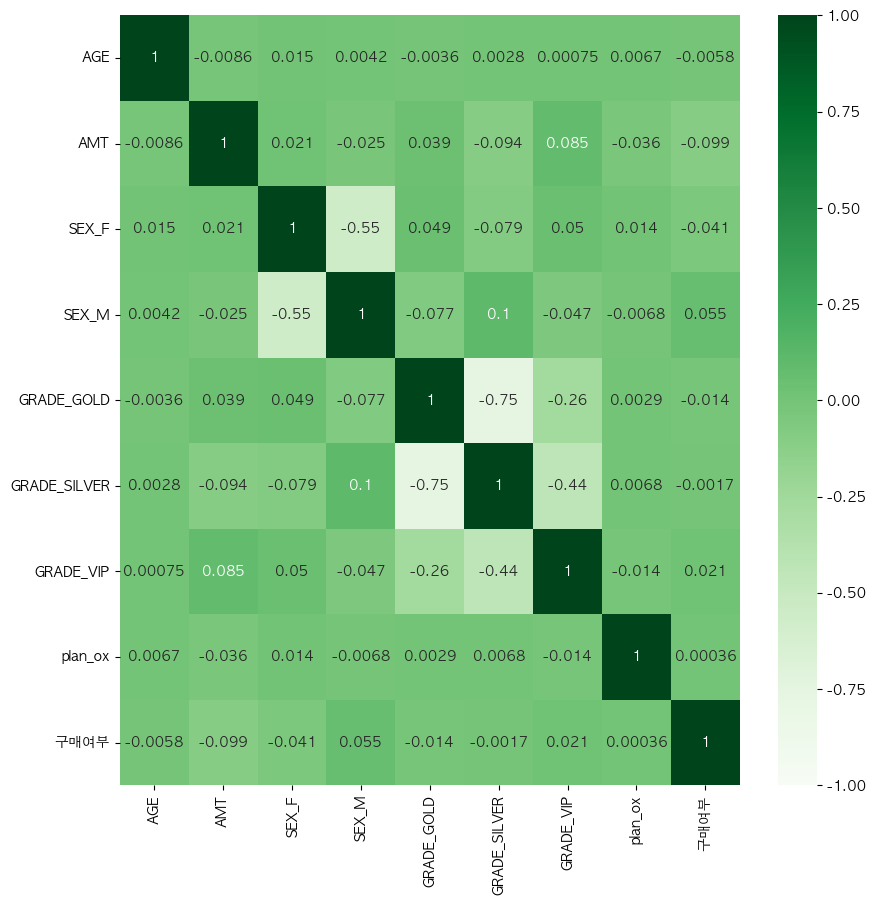

In [188]:
import seaborn as sb
plt.rcParams["figure.figsize"] = (10, 10)
sb.heatmap(df4.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )



In [186]:
import matplotlib.pyplot as plt

In [191]:
plt.savefig('plan_ox.jpg')

<Figure size 1000x1000 with 0 Axes>

In [180]:
df5 = df5[['AGE', 'AMT', 'SEX_F', 'SEX_M', 'GRADE_GOLD', 'GRADE_SILVER',
       'GRADE_VIP', '퍼블리싱여부', '구매여부']]
df6

,AGE,AMT,SEX_F,SEX_M,GRADE_GOLD,GRADE_SILVER,GRADE_VIP,퍼블리싱여부,구매여부
29,49,78400,1,0,0,1,0,0.0,0
47,50,39000,0,0,1,0,0,0.0,1
57,50,138600,0,0,1,0,0,0.0,0
82,51,59000,1,0,0,1,0,NaN,1
112,50,69000,1,0,0,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...
831334,38,5,1,0,0,1,0,0.0,0
831335,38,5,1,0,0,1,0,0.0,0
831336,54,20,1,0,0,1,0,0.0,0
831435,51,119000,1,0,1,0,0,0.0,1


In [181]:
df5[df5['퍼블리싱여부']==1]

,AGE,AMT,SEX_F,SEX_M,GRADE_GOLD,GRADE_SILVER,GRADE_VIP,퍼블리싱여부,구매여부
439248,62,69000,1,0,1,0,0,1.0,0
439254,60,79000,1,0,0,1,0,1.0,1
439262,62,166800,1,0,1,0,0,1.0,0
439370,50,29000,0,0,0,1,0,1.0,0
439371,50,7000,0,0,0,1,0,1.0,0
...,...,...,...,...,...,...,...,...,...
830418,52,149000,1,0,1,0,0,1.0,0
830694,60,82800,1,0,0,1,0,1.0,0
830894,57,67640,0,0,0,1,0,1.0,0
831004,58,79200,1,0,0,1,0,1.0,1


In [46]:
plt.rcParams['font.family'] = 'AppleGothic' # 폰트 변경
plt.rcParams['axes.unicode_minus'] = False # 축 값 마이너스 깨짐 해결

<Axes: >

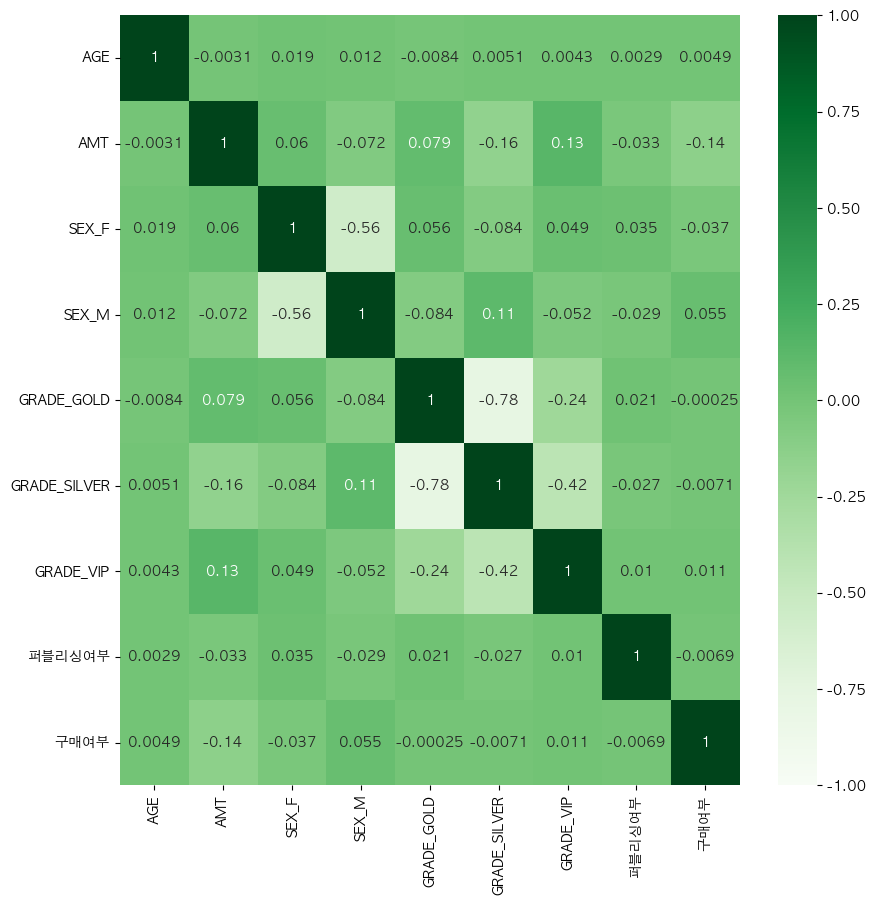

In [183]:
import seaborn as sb
plt.rcParams["figure.figsize"] = (10, 10)
sb.heatmap(df5.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [96]:
b = df1[df1['PLAN_ox']==1]
b

,ORD_DT,ORD_NO,ORD_DTL_STAT,CUST_NO,SEX_GB,GOODS_CD,ORD_AMT,ORD_QTY,PLAN_DTL_SQ,PLAN_ox,퍼블리싱여부,구매여부,total
29,2022-06-03 14:30:52,100596759,G013_99,171022,F,521A5UW772_WH,78400,1,1994.0,1,0.0,0,78400
47,2022-06-05 19:52:44,100599032,G013_60,377760,NaN,221A1TO058_DL,39000,1,1771.0,1,0.0,1,39000
57,2022-06-05 20:27:19,100599090,G013_00,427778,NaN,421A2TO079_VO,138600,1,610.0,1,0.0,0,138600
82,2022-06-03 18:58:38,100597040,G013_60,445749,F,112A2PS907_BL,59000,1,1349.0,1,NaN,1,59000
112,2022-06-09 16:39:30,100603124,G013_00,437840,F,121A1TO052_PK,69000,1,559.0,1,0.0,0,69000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
831333,2023-06-28 12:32:35,101164321,G013_99,383774,F,523C2TS953_WH,5,1,6902.0,1,0.0,0,5
831334,2023-06-28 12:32:35,101164321,G013_99,383774,F,521C2SE754_BK,5,1,6902.0,1,0.0,0,5
831335,2023-06-28 12:34:34,101164337,G013_99,456115,F,521C2CP671_WH,10,2,6712.0,1,0.0,0,20
831434,2023-06-24 13:08:57,101158013,G013_60,142215,F,511B2TO007_BK,119000,1,7057.0,1,0.0,1,119000


In [97]:
b=b[['total', 'PLAN_ox', '퍼블리싱여부', '구매여부']]
b

,total,PLAN_ox,퍼블리싱여부,구매여부
29,78400,1,0.0,0
47,39000,1,0.0,1
57,138600,1,0.0,0
82,59000,1,NaN,1
112,69000,1,0.0,0
...,...,...,...,...
831333,5,1,0.0,0
831334,5,1,0.0,0
831335,20,1,0.0,0
831434,119000,1,0.0,1


In [93]:
b[b['퍼블리싱여부'].isna()]

,total,PLAN_ox,퍼블리싱여부,구매여부
82,59000,1,NaN,1
439,82500,1,NaN,1
515,79200,1,NaN,1
653,104500,1,NaN,1
719,79200,1,NaN,1
...,...,...,...,...
830601,39000,1,NaN,0
830941,159200,1,NaN,0
831011,189000,1,NaN,0
831215,197400,1,NaN,0


In [73]:
b = b.astype({'퍼블리싱여부':'int'})
b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6452 entries, 439247 to 831028
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   total    6452 non-null   int64
 1   PLAN_ox  6452 non-null   int64
 2   퍼블리싱여부   6452 non-null   int64
 3   구매여부     6452 non-null   int64
dtypes: int64(4)
memory usage: 252.0 KB


In [74]:
b

,total,PLAN_ox,퍼블리싱여부,구매여부
439247,69000,1,1,0
439253,79000,1,1,1
439261,166800,1,1,0
439369,29000,1,1,0
439370,7000,1,1,0
...,...,...,...,...
830417,149000,1,1,0
830693,82800,1,1,0
830893,67640,1,1,0
831003,79200,1,1,1


<Axes: >

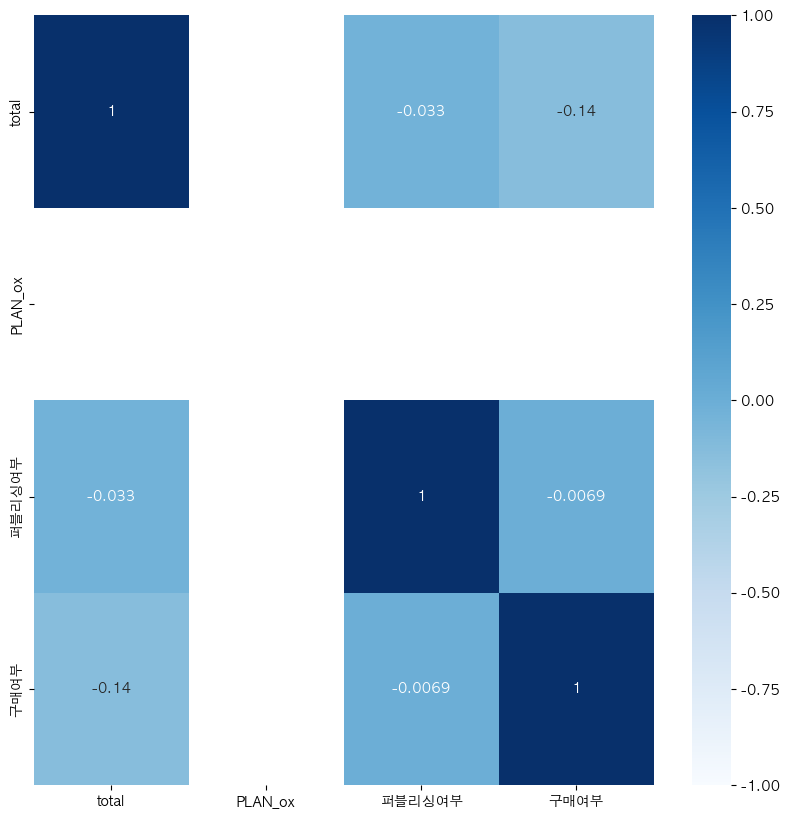

In [98]:
import seaborn as sb
plt.rcParams["figure.figsize"] = (10, 10)
sb.heatmap(b.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Blues', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [57]:
b['퍼블리싱여부']

439247    1.0
439253    1.0
439261    1.0
439369    1.0
439370    1.0
         ... 
830417    1.0
830693    1.0
830893    1.0
831003    1.0
831028    1.0
Name: 퍼블리싱여부, Length: 6452, dtype: float64

In [99]:
correlation_coefficient, p_value = pearsonr(b['퍼블리싱여부'], b['구매여부'])
print(f"상관계수: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.2f}")

ValueError: array must not contain infs or NaNs

In [14]:
df1 = df[['ORD_QTY', 'PLAN_DTL_SQ']]
df1

,ORD_QTY,PLAN_DTL_SQ
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
866800,1,0
866801,1,0
866802,1,0
866803,1,0


In [12]:
correlation_coefficient, p_value = pearsonr(df['ORD_QTY'], df['PLAN_DTL_SQ'])
print(f"상관계수: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.2f}")

상관계수: -0.01
P-value: 0.00


<Axes: >

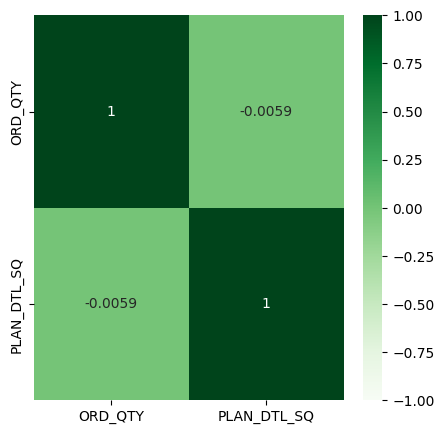

In [15]:
import seaborn as sb
plt.rcParams["figure.figsize"] = (5,5)
sb.heatmap(df1.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [16]:
df['PLAN_DTL_SQ'].value_counts()

PLAN_DTL_SQ
0    815820
1     50985
Name: count, dtype: int64

In [6]:
d.isna().sum()

ORD_DT                                  0
ORD_NO                                  0
CUST_NO                                 0
PKG_CRYPTO.AES128_DEC(C.SEX_GB)    386082
GOODS_CD                                0
ORD_QTY                                 0
PLAN_DTL_SQ                        815820
dtype: int64

In [7]:
# 결측값 변환
plan = plan.replace(np.nan, 0)

In [10]:
plan= plan.astype({'퍼블리싱여부':'int'})

In [11]:
plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   기획전번호   326 non-null    int64
 1   상품갯수    326 non-null    int64
 2   주문횟수    326 non-null    int64
 3   주문량     326 non-null    int64
 4   퍼블리싱여부  326 non-null    int64
dtypes: int64(5)
memory usage: 12.9 KB


In [12]:
df1= pd.merge(df, plan['퍼블리싱여부'], left_on='PLAN_SQ', right_on=plan['기획전번호'], how='left')
df1

,ORD_DT,ORD_NO,ORD_DTL_NO,CUST_NO,PKG_CRYPTO.AES128_DEC(C.CUST_NM),PKG_CRYPTO.AES128_DEC(C.SEX_GB),GOODS_CD,ORD_QTY,REAL_ORD_AMT,ITEMKIND_CD,PLAN_SQ,PLAN_DTL_SQ,DISP_STDT,DISP_EDDT,퍼블리싱여부
0,2023-03-06 01:33:49,100903322,1525914,506249,라윤정,G007_F,221A1SV151_VO,1,49000,010503F,2522,5518,2023-03-06,2023-03-13 23:59:59,1
1,2023-03-06 06:24:45,100903374,1526017,333622,신현자,NaN,421A2SR159_BK,1,151334,010501F,2522,5521,2023-03-06,2023-03-13 23:59:59,1
2,2023-03-06 06:24:45,100903374,1526016,333622,신현자,NaN,421A2SR159_PK,1,151334,010501F,2522,5521,2023-03-06,2023-03-13 23:59:59,1
3,2023-03-06 06:43:13,100903380,1526033,506544,김민정,NaN,122A1SR951_BK,1,59000,010501F,2522,5521,2023-03-06,2023-03-13 23:59:59,1
4,2023-03-06 07:43:26,100903405,1526069,507136,박미향,G007_F,422A1TS951_BG,1,69000,010104F,2522,5522,2023-03-06,2023-03-13 23:59:59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15648,2023-08-17 11:30:55,101246835,2108482,372832,박재란,G007_F,222B2TI954_WH,1,17148,010104F,3091,6718,2023-05-26,2023-12-31 23:59:59,0
15649,2023-08-17 12:23:16,101246893,2108597,494071,김희순,G007_F,531A5CP622_MG,1,24990,041303Z,2946,6817,2023-06-07 09:00:00,2023-08-31 09:00:59,0
15650,2023-08-17 13:21:33,101247037,2108802,544438,이승훈,G007_M,411B2TO003_WH,1,148270,010102M,2949,6382,2023-05-11,2023-08-31 23:59:59,0
15651,2023-08-17 13:47:38,101247072,2108867,383857,한경순,NaN,521A6BG656_BK,1,71298,031201F,3431,7780,2023-08-14 09:00:00,2023-08-28 08:59:59,1


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15653 entries, 0 to 15652
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   ORD_DT                            15653 non-null  object
 1   ORD_NO                            15653 non-null  int64 
 2   ORD_DTL_NO                        15653 non-null  int64 
 3   CUST_NO                           15653 non-null  int64 
 4   PKG_CRYPTO.AES128_DEC(C.CUST_NM)  15653 non-null  object
 5   PKG_CRYPTO.AES128_DEC(C.SEX_GB)   12847 non-null  object
 6   GOODS_CD                          15653 non-null  object
 7   ORD_QTY                           15653 non-null  int64 
 8   REAL_ORD_AMT                      15653 non-null  int64 
 9   ITEMKIND_CD                       15653 non-null  object
 10  PLAN_SQ                           15653 non-null  int64 
 11  PLAN_DTL_SQ                       15653 non-null  int64 
 12  DISP_STDT         

In [14]:
df1 = df1.replace({'PKG_CRYPTO.AES128_DEC(C.SEX_GB)':'G007_F'}, 'F')
df1 = df1.replace({'PKG_CRYPTO.AES128_DEC(C.SEX_GB)':'G007_M'}, 'M')
df1

,ORD_DT,ORD_NO,ORD_DTL_NO,CUST_NO,PKG_CRYPTO.AES128_DEC(C.CUST_NM),PKG_CRYPTO.AES128_DEC(C.SEX_GB),GOODS_CD,ORD_QTY,REAL_ORD_AMT,ITEMKIND_CD,PLAN_SQ,PLAN_DTL_SQ,DISP_STDT,DISP_EDDT,퍼블리싱여부
0,2023-03-06 01:33:49,100903322,1525914,506249,라윤정,F,221A1SV151_VO,1,49000,010503F,2522,5518,2023-03-06,2023-03-13 23:59:59,1
1,2023-03-06 06:24:45,100903374,1526017,333622,신현자,NaN,421A2SR159_BK,1,151334,010501F,2522,5521,2023-03-06,2023-03-13 23:59:59,1
2,2023-03-06 06:24:45,100903374,1526016,333622,신현자,NaN,421A2SR159_PK,1,151334,010501F,2522,5521,2023-03-06,2023-03-13 23:59:59,1
3,2023-03-06 06:43:13,100903380,1526033,506544,김민정,NaN,122A1SR951_BK,1,59000,010501F,2522,5521,2023-03-06,2023-03-13 23:59:59,1
4,2023-03-06 07:43:26,100903405,1526069,507136,박미향,F,422A1TS951_BG,1,69000,010104F,2522,5522,2023-03-06,2023-03-13 23:59:59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15648,2023-08-17 11:30:55,101246835,2108482,372832,박재란,F,222B2TI954_WH,1,17148,010104F,3091,6718,2023-05-26,2023-12-31 23:59:59,0
15649,2023-08-17 12:23:16,101246893,2108597,494071,김희순,F,531A5CP622_MG,1,24990,041303Z,2946,6817,2023-06-07 09:00:00,2023-08-31 09:00:59,0
15650,2023-08-17 13:21:33,101247037,2108802,544438,이승훈,M,411B2TO003_WH,1,148270,010102M,2949,6382,2023-05-11,2023-08-31 23:59:59,0
15651,2023-08-17 13:47:38,101247072,2108867,383857,한경순,NaN,521A6BG656_BK,1,71298,031201F,3431,7780,2023-08-14 09:00:00,2023-08-28 08:59:59,1


In [15]:
df1.columns = ['ord_dt', 'ord_no', 'ord_dtl_no', 'cust_no', 'cust_nm', 'sex_gb', 'goods_cd', 'ord_qty', 'real_ord_amt', 'itemkind', 'plan_sq', 'plan_dtl_sq', 'plan_stdt', 'plan_eddt', 'publish']

In [16]:
df1.columns

Index(['ord_dt', 'ord_no', 'ord_dtl_no', 'cust_no', 'cust_nm', 'sex_gb',
       'goods_cd', 'ord_qty', 'real_ord_amt', 'itemkind', 'plan_sq',
       'plan_dtl_sq', 'plan_stdt', 'plan_eddt', 'publish'],
      dtype='object')

In [17]:
df1

,ord_dt,ord_no,ord_dtl_no,cust_no,cust_nm,sex_gb,goods_cd,ord_qty,real_ord_amt,itemkind,plan_sq,plan_dtl_sq,plan_stdt,plan_eddt,publish
0,2023-03-06 01:33:49,100903322,1525914,506249,라윤정,F,221A1SV151_VO,1,49000,010503F,2522,5518,2023-03-06,2023-03-13 23:59:59,1
1,2023-03-06 06:24:45,100903374,1526017,333622,신현자,NaN,421A2SR159_BK,1,151334,010501F,2522,5521,2023-03-06,2023-03-13 23:59:59,1
2,2023-03-06 06:24:45,100903374,1526016,333622,신현자,NaN,421A2SR159_PK,1,151334,010501F,2522,5521,2023-03-06,2023-03-13 23:59:59,1
3,2023-03-06 06:43:13,100903380,1526033,506544,김민정,NaN,122A1SR951_BK,1,59000,010501F,2522,5521,2023-03-06,2023-03-13 23:59:59,1
4,2023-03-06 07:43:26,100903405,1526069,507136,박미향,F,422A1TS951_BG,1,69000,010104F,2522,5522,2023-03-06,2023-03-13 23:59:59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15648,2023-08-17 11:30:55,101246835,2108482,372832,박재란,F,222B2TI954_WH,1,17148,010104F,3091,6718,2023-05-26,2023-12-31 23:59:59,0
15649,2023-08-17 12:23:16,101246893,2108597,494071,김희순,F,531A5CP622_MG,1,24990,041303Z,2946,6817,2023-06-07 09:00:00,2023-08-31 09:00:59,0
15650,2023-08-17 13:21:33,101247037,2108802,544438,이승훈,M,411B2TO003_WH,1,148270,010102M,2949,6382,2023-05-11,2023-08-31 23:59:59,0
15651,2023-08-17 13:47:38,101247072,2108867,383857,한경순,NaN,521A6BG656_BK,1,71298,031201F,3431,7780,2023-08-14 09:00:00,2023-08-28 08:59:59,1


In [18]:
df2= pd.merge(df1, item['ITEMKIND_NM'], left_on='itemkind', right_on=item['ITEMKIND_CD'], how='left')
df2

,ord_dt,ord_no,ord_dtl_no,cust_no,cust_nm,sex_gb,goods_cd,ord_qty,real_ord_amt,itemkind,plan_sq,plan_dtl_sq,plan_stdt,plan_eddt,publish,ITEMKIND_NM
0,2023-03-06 01:33:49,100903322,1525914,506249,라윤정,F,221A1SV151_VO,1,49000,010503F,2522,5518,2023-03-06,2023-03-13 23:59:59,1,WOMEN>니트/가디건>베스트
1,2023-03-06 06:24:45,100903374,1526017,333622,신현자,NaN,421A2SR159_BK,1,151334,010501F,2522,5521,2023-03-06,2023-03-13 23:59:59,1,WOMEN>니트/가디건>니트
2,2023-03-06 06:24:45,100903374,1526016,333622,신현자,NaN,421A2SR159_PK,1,151334,010501F,2522,5521,2023-03-06,2023-03-13 23:59:59,1,WOMEN>니트/가디건>니트
3,2023-03-06 06:43:13,100903380,1526033,506544,김민정,NaN,122A1SR951_BK,1,59000,010501F,2522,5521,2023-03-06,2023-03-13 23:59:59,1,WOMEN>니트/가디건>니트
4,2023-03-06 07:43:26,100903405,1526069,507136,박미향,F,422A1TS951_BG,1,69000,010104F,2522,5522,2023-03-06,2023-03-13 23:59:59,1,WOMEN>티셔츠>긴팔이너
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15648,2023-08-17 11:30:55,101246835,2108482,372832,박재란,F,222B2TI954_WH,1,17148,010104F,3091,6718,2023-05-26,2023-12-31 23:59:59,0,WOMEN>티셔츠>긴팔이너
15649,2023-08-17 12:23:16,101246893,2108597,494071,김희순,F,531A5CP622_MG,1,24990,041303Z,2946,6817,2023-06-07 09:00:00,2023-08-31 09:00:59,0,UNISEX>모자>썬바이저
15650,2023-08-17 13:21:33,101247037,2108802,544438,이승훈,M,411B2TO003_WH,1,148270,010102M,2949,6382,2023-05-11,2023-08-31 23:59:59,0,MEN>티셔츠>반팔
15651,2023-08-17 13:47:38,101247072,2108867,383857,한경순,NaN,521A6BG656_BK,1,71298,031201F,3431,7780,2023-08-14 09:00:00,2023-08-28 08:59:59,1,WOMEN>가방>여자가방


In [19]:
df1.isna().sum()

ord_dt             0
ord_no             0
ord_dtl_no         0
cust_no            0
cust_nm            0
sex_gb          2806
goods_cd           0
ord_qty            0
real_ord_amt       0
itemkind           0
plan_sq            0
plan_dtl_sq        0
plan_stdt          0
plan_eddt          0
publish            0
dtype: int64

In [20]:
df1 = df1.fillna("none")
df1

,ord_dt,ord_no,ord_dtl_no,cust_no,cust_nm,sex_gb,goods_cd,ord_qty,real_ord_amt,itemkind,plan_sq,plan_dtl_sq,plan_stdt,plan_eddt,publish
0,2023-03-06 01:33:49,100903322,1525914,506249,라윤정,F,221A1SV151_VO,1,49000,010503F,2522,5518,2023-03-06,2023-03-13 23:59:59,1
1,2023-03-06 06:24:45,100903374,1526017,333622,신현자,none,421A2SR159_BK,1,151334,010501F,2522,5521,2023-03-06,2023-03-13 23:59:59,1
2,2023-03-06 06:24:45,100903374,1526016,333622,신현자,none,421A2SR159_PK,1,151334,010501F,2522,5521,2023-03-06,2023-03-13 23:59:59,1
3,2023-03-06 06:43:13,100903380,1526033,506544,김민정,none,122A1SR951_BK,1,59000,010501F,2522,5521,2023-03-06,2023-03-13 23:59:59,1
4,2023-03-06 07:43:26,100903405,1526069,507136,박미향,F,422A1TS951_BG,1,69000,010104F,2522,5522,2023-03-06,2023-03-13 23:59:59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15648,2023-08-17 11:30:55,101246835,2108482,372832,박재란,F,222B2TI954_WH,1,17148,010104F,3091,6718,2023-05-26,2023-12-31 23:59:59,0
15649,2023-08-17 12:23:16,101246893,2108597,494071,김희순,F,531A5CP622_MG,1,24990,041303Z,2946,6817,2023-06-07 09:00:00,2023-08-31 09:00:59,0
15650,2023-08-17 13:21:33,101247037,2108802,544438,이승훈,M,411B2TO003_WH,1,148270,010102M,2949,6382,2023-05-11,2023-08-31 23:59:59,0
15651,2023-08-17 13:47:38,101247072,2108867,383857,한경순,none,521A6BG656_BK,1,71298,031201F,3431,7780,2023-08-14 09:00:00,2023-08-28 08:59:59,1


In [32]:
df1['ord_dt'] = pd.to_datetime(df1['ord_dt'], format = 'mixed')

In [33]:
df1.isna().sum()

ord_dt          0
ord_no          0
ord_dtl_no      0
cust_no         0
cust_nm         0
sex_gb          0
goods_cd        0
ord_qty         0
real_ord_amt    0
itemkind        0
plan_sq         0
plan_dtl_sq     0
plan_stdt       0
plan_eddt       0
publish         0
dtype: int64

<Axes: xlabel='ord_dt'>

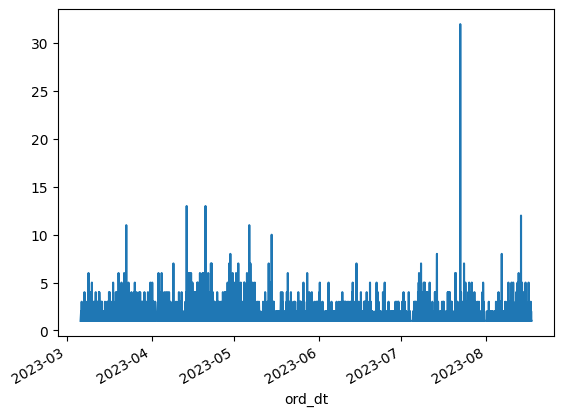

In [34]:
date_quantity_series = df1.groupby('ord_dt')['ord_qty'].sum()
date_quantity_series.plot()

In [36]:
plt.rcParams['font.family'] = 'AppleGothic' # 폰트 변경
plt.rcParams['axes.unicode_minus'] = False # 축 값 마이너스 깨짐 해결

In [37]:
sex_counts = df1['sex_gb'].value_counts()
sex_counts


sex_gb
F       10557
none     2806
M        2290
Name: count, dtype: int64

<Axes: xlabel='sex_gb'>

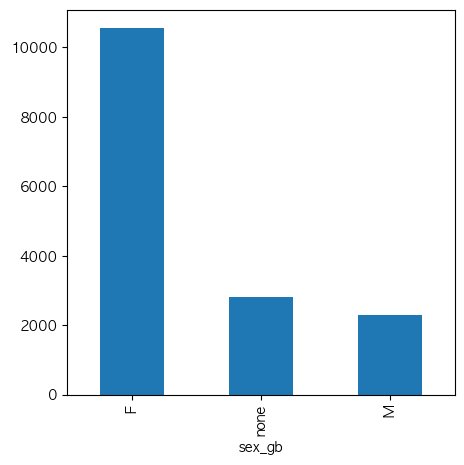

In [38]:
# 막대 그래프 그리기
sex_counts.plot(kind='bar')

<Axes: xlabel='ITEMKIND_NM'>

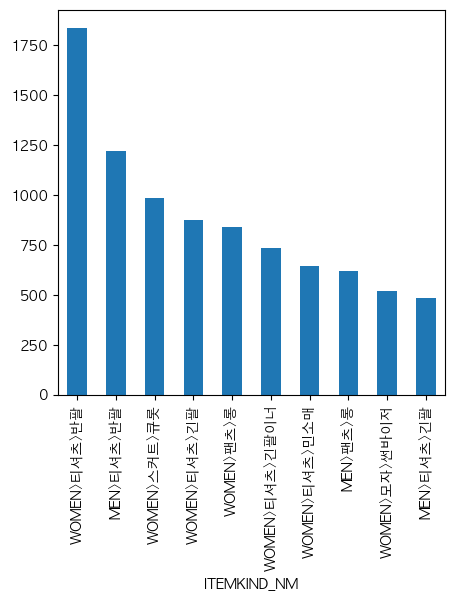

In [48]:
d = df2['ITEMKIND_NM'].value_counts()
d[:10].plot(kind='bar')

In [57]:
df2['hour'] = df2['ord_dt'].dt.hour
df2

,ord_dt,ord_no,ord_dtl_no,cust_no,cust_nm,sex_gb,goods_cd,ord_qty,real_ord_amt,itemkind,plan_sq,plan_dtl_sq,plan_stdt,plan_eddt,publish,ITEMKIND_NM,hour
0,2023-03-06 01:33:49,100903322,1525914,506249,라윤정,F,221A1SV151_VO,1,49000,010503F,2522,5518,2023-03-06,2023-03-13 23:59:59,1,WOMEN>니트/가디건>베스트,1
1,2023-03-06 06:24:45,100903374,1526017,333622,신현자,none,421A2SR159_BK,1,151334,010501F,2522,5521,2023-03-06,2023-03-13 23:59:59,1,WOMEN>니트/가디건>니트,6
2,2023-03-06 06:24:45,100903374,1526016,333622,신현자,none,421A2SR159_PK,1,151334,010501F,2522,5521,2023-03-06,2023-03-13 23:59:59,1,WOMEN>니트/가디건>니트,6
3,2023-03-06 06:43:13,100903380,1526033,506544,김민정,none,122A1SR951_BK,1,59000,010501F,2522,5521,2023-03-06,2023-03-13 23:59:59,1,WOMEN>니트/가디건>니트,6
4,2023-03-06 07:43:26,100903405,1526069,507136,박미향,F,422A1TS951_BG,1,69000,010104F,2522,5522,2023-03-06,2023-03-13 23:59:59,1,WOMEN>티셔츠>긴팔이너,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15648,2023-08-17 11:30:55,101246835,2108482,372832,박재란,F,222B2TI954_WH,1,17148,010104F,3091,6718,2023-05-26,2023-12-31 23:59:59,0,WOMEN>티셔츠>긴팔이너,11
15649,2023-08-17 12:23:16,101246893,2108597,494071,김희순,F,531A5CP622_MG,1,24990,041303Z,2946,6817,2023-06-07 09:00:00,2023-08-31 09:00:59,0,UNISEX>모자>썬바이저,12
15650,2023-08-17 13:21:33,101247037,2108802,544438,이승훈,M,411B2TO003_WH,1,148270,010102M,2949,6382,2023-05-11,2023-08-31 23:59:59,0,MEN>티셔츠>반팔,13
15651,2023-08-17 13:47:38,101247072,2108867,383857,한경순,none,521A6BG656_BK,1,71298,031201F,3431,7780,2023-08-14 09:00:00,2023-08-28 08:59:59,1,WOMEN>가방>여자가방,13


<Axes: xlabel='hour'>

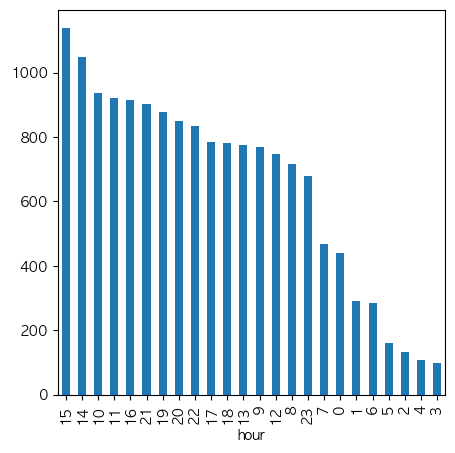

In [58]:
h = df2['hour'].value_counts()
h.plot(kind='bar')

In [62]:
df2['month'] = df2['ord_dt'].dt.month
df2

,ord_dt,ord_no,ord_dtl_no,cust_no,cust_nm,sex_gb,goods_cd,ord_qty,real_ord_amt,itemkind,plan_sq,plan_dtl_sq,plan_stdt,plan_eddt,publish,ITEMKIND_NM,hour,month
0,2023-03-06 01:33:49,100903322,1525914,506249,라윤정,F,221A1SV151_VO,1,49000,010503F,2522,5518,2023-03-06,2023-03-13 23:59:59,1,WOMEN>니트/가디건>베스트,1,3
1,2023-03-06 06:24:45,100903374,1526017,333622,신현자,none,421A2SR159_BK,1,151334,010501F,2522,5521,2023-03-06,2023-03-13 23:59:59,1,WOMEN>니트/가디건>니트,6,3
2,2023-03-06 06:24:45,100903374,1526016,333622,신현자,none,421A2SR159_PK,1,151334,010501F,2522,5521,2023-03-06,2023-03-13 23:59:59,1,WOMEN>니트/가디건>니트,6,3
3,2023-03-06 06:43:13,100903380,1526033,506544,김민정,none,122A1SR951_BK,1,59000,010501F,2522,5521,2023-03-06,2023-03-13 23:59:59,1,WOMEN>니트/가디건>니트,6,3
4,2023-03-06 07:43:26,100903405,1526069,507136,박미향,F,422A1TS951_BG,1,69000,010104F,2522,5522,2023-03-06,2023-03-13 23:59:59,1,WOMEN>티셔츠>긴팔이너,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15648,2023-08-17 11:30:55,101246835,2108482,372832,박재란,F,222B2TI954_WH,1,17148,010104F,3091,6718,2023-05-26,2023-12-31 23:59:59,0,WOMEN>티셔츠>긴팔이너,11,8
15649,2023-08-17 12:23:16,101246893,2108597,494071,김희순,F,531A5CP622_MG,1,24990,041303Z,2946,6817,2023-06-07 09:00:00,2023-08-31 09:00:59,0,UNISEX>모자>썬바이저,12,8
15650,2023-08-17 13:21:33,101247037,2108802,544438,이승훈,M,411B2TO003_WH,1,148270,010102M,2949,6382,2023-05-11,2023-08-31 23:59:59,0,MEN>티셔츠>반팔,13,8
15651,2023-08-17 13:47:38,101247072,2108867,383857,한경순,none,521A6BG656_BK,1,71298,031201F,3431,7780,2023-08-14 09:00:00,2023-08-28 08:59:59,1,WOMEN>가방>여자가방,13,8


In [67]:
df2['ord_dt'].max()
df2['ord_dt'].min()

Timestamp('2023-03-06 01:33:49')

month
4    4992
7    2625
5    2561
3    2314
6    1910
8    1251
Name: count, dtype: int64


<Axes: xlabel='month'>

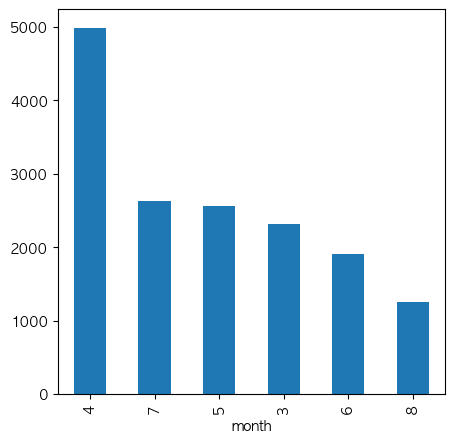

In [64]:
m = df2['month'].value_counts()
print(m)
m.plot(kind='bar')

In [70]:
plan_dt = pd.read_csv("./plan.csv")
plan_dt

,PLAN_SQ,PLAN_NM,PLAN_GB,SITE_CD,FRONT_GB,DISP_STDT,DISP_EDDT,MAIN_IMG,REPLY_YN,REPLY_TITLE,...,DEL_YN,OPEN_YN,DISP_ORD,DEV_URL,REG_NO,REG_DT,UPD_NO,UPD_DT,TIMER_YN,POPUP_IMG
0,1,[C#],P,G000_10,P|M|A,2022.1.3,2023.1.31 23:59,NaN,N,NaN,...,Y,Y,0,NaN,75,2022.1.3 15:25,75,2022.1.3 15:47,N,NaN
1,2,[C# 03] In the Daytime : ACCESSORY,P,G000_10,P|M|A,2022.1.3,2023.1.31 23:59,NaN,N,NaN,...,Y,Y,0,NaN,74,2022.1.3 15:53,73,2022.1.4 19:39,N,NaN
2,3,[C# 01] VESSEL,P,G000_10,P|M|A,2022.1.3 5:00,2023.1.3 23:59,NaN,N,NaN,...,Y,Y,0,NaN,75,2022.1.3 15:57,73,2022.1.4 19:39,N,NaN
3,4,[C# 02] Knit Moment : 니트 스타일링,P,G000_10,P|M|A,2022.1.3 3:00,2023.1.3 23:59,NaN,N,NaN,...,Y,Y,0,NaN,75,2022.1.3 17:19,73,2022.1.4 19:39,N,NaN
4,5,[C# 04] WINTERISM,P,G000_10,P|M|A,2022.1.4 3:00,2023.1.4 23:59,NaN,N,NaN,...,Y,Y,0,NaN,75,2022.1.4 9:31,73,2022.1.4 19:39,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,3532,[통합] WEEKLY BEST,P,G000_10,P|M|A,2023.8.18 9:00,2023.8.20 23:59,/planning/202308/PLANNING_20230816105342.jpg,N,NaN,...,N,Y,0,NaN,994,2023.8.14 18:00,994,2023.8.16 16:46,N,/planning/202308/PLANNING_20230814180019.null
430,3551,[이벤트] 크리스몰 X 신한카드 즉시할인,P,G000_10,P|M|A,2023.9.11,2023.9.30 23:59,/planning/202308/PLANNING_20230816155050.null,N,NaN,...,N,Y,0,NaN,73,2023.8.16 15:50,73,2023.8.16 15:50,N,/planning/202308/PLANNING_20230816155050.null
431,3552,[St Andrews] FALL IN St ANDREWS,P,G000_10,P|M|A,2023.9.4,2023.12.31 23:59,/planning/202308/PLANNING_20230816163715.null,N,NaN,...,N,Y,0,NaN,12,2023.8.16 16:37,12,2023.8.18 10:21,N,/planning/202308/PLANNING_20230816163715.null
432,3553,[통합] 23SS EDITORIAL COLLECTION ON/OFF TIME,P,G000_10,P|M|A,2023.8.21 9:00,2023.9.4 8:59,/planning/202308/PLANNING_20230818101555.jpg,N,NaN,...,N,Y,0,NaN,37,2023.8.17 14:18,713,2023.8.18 10:15,N,/planning/202308/PLANNING_20230817141816.null


In [78]:
plan

,기획전번호,상품갯수,주문횟수,주문량,퍼블리싱여부
0,21,33,4,4,0
1,23,172,3,3,0
2,24,545,6,6,0
3,25,199,4,4,0
4,26,269,6,6,0
...,...,...,...,...,...
321,3433,58,2,2,0
322,3451,528,30,30,0
323,3492,545,18,18,0
324,3514,1152,211,211,0


In [80]:
plan_n = pd.merge(plan, plan_dt[['DISP_STDT', 'DISP_EDDT']], left_on='기획전번호', right_on=plan_dt['PLAN_SQ'], how='left')
plan_n

,기획전번호,상품갯수,주문횟수,주문량,퍼블리싱여부,DISP_STDT,DISP_EDDT
0,21,33,4,4,0,2022.4.21,2022.5.1 23:59
1,23,172,3,3,0,2022.1.12,2022.3.31 23:59
2,24,545,6,6,0,2022.1.12 9:00,2022.1.24 23:59
3,25,199,4,4,0,2022.1.6,2022.2.28 23:59
4,26,269,6,6,0,2022.1.6,2022.2.28 23:59
...,...,...,...,...,...,...,...
321,3433,58,2,2,0,2023.8.10 9:00,2023.8.21 9:00
322,3451,528,30,30,0,2023.8.4 9:00,2023.8.6 23:59
323,3492,545,18,18,0,2023.8.11 9:00,2023.8.13 23:59
324,3514,1152,211,211,0,2023.8.12 9:00,2023.8.20 23:59


In [81]:
plan_f = plan_n[plan_n['기획전번호']>=2522]
plan_f

,기획전번호,상품갯수,주문횟수,주문량,퍼블리싱여부,DISP_STDT,DISP_EDDT
215,2522,1955,1375,1378,1,2023.3.6,2023.3.20 23:59
216,2542,1028,131,131,0,2023.3.6,2023.3.13 23:59
217,2562,181,6,6,0,2023.3.13,2023.4.2 23:59
218,2582,56,3,3,1,2023.3.20,2023.3.29 23:59
219,2602,651,13,13,1,2023.3.20,2023.7.31 23:59
...,...,...,...,...,...,...,...
321,3433,58,2,2,0,2023.8.10 9:00,2023.8.21 9:00
322,3451,528,30,30,0,2023.8.4 9:00,2023.8.6 23:59
323,3492,545,18,18,0,2023.8.11 9:00,2023.8.13 23:59
324,3514,1152,211,211,0,2023.8.12 9:00,2023.8.20 23:59


In [85]:
plan_f['비율'] = plan_f['주문량'] / plan_f['상품갯수']
f = plan_f.sort_values(by='비율', ascending=False)
f

/var/folders/td/q953q7z14hscmqdbcfv5bkr00000gn/T/ipykernel_24713/1822454647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plan_f['비율'] = plan_f['주문량'] / plan_f['상품갯수']


,기획전번호,상품갯수,주문횟수,주문량,퍼블리싱여부,DISP_STDT,DISP_EDDT,비율
264,3024,231,563,574,0,2023.5.17 9:00,2023.9.30 23:59,2.484848
251,2908,301,538,538,0,2023.4.22 9:00,2023.4.23 8:59,1.787375
221,2662,650,854,862,0,2023.3.8,2023.12.31 23:59,1.326154
245,2864,2110,2595,2628,0,2023.7.7 7:00,2023.7.31 8:59,1.245498
248,2905,320,301,336,0,2023.4.19 9:00,2023.4.20 8:59,1.050000
...,...,...,...,...,...,...,...,...
317,3413,424,3,3,0,2023.8.1,2023.8.12 23:59,0.007075
318,3414,693,3,3,0,2023.8.14 9:00,2023.8.21 8:59,0.004329
233,2782,578,2,2,0,2023.3.29,2024.12.31 23:59,0.003460
320,3432,412,1,1,1,2023.8.14 9:00,2023.8.28 8:59,0.002427


In [86]:
df2['plan_sq'].value_counts()

plan_sq
2864    2595
2522    1375
2949    1011
2662     854
2683     727
        ... 
3071       2
2884       1
2743       1
3113       1
3432       1
Name: count, Length: 111, dtype: int64

<Axes: xlabel='ord_dt'>

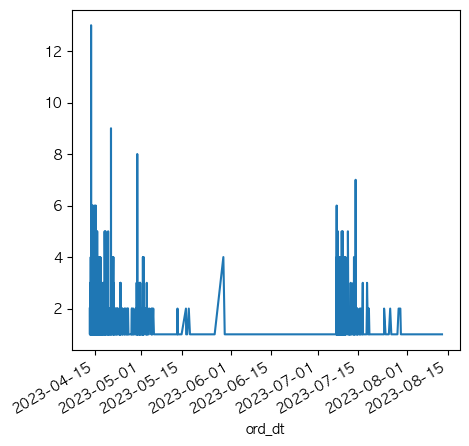

In [92]:
q = df2[df2['plan_sq']==2864]
date_transaction_series = q.groupby('ord_dt')['ord_qty'].sum()
date_transaction_series.plot()

In [61]:
e = df2[['sex_gb',
       'ord_qty', 'real_ord_amt', 'itemkind', 'publish']]
e

,ord_qty,real_ord_amt,itemkind,publish
0,1,49000,010503F,1
1,1,151334,010501F,1
2,1,151334,010501F,1
3,1,59000,010501F,1
4,1,69000,010104F,1
...,...,...,...,...
15648,1,17148,010104F,0
15649,1,24990,041303Z,0
15650,1,148270,010102M,0
15651,1,71298,031201F,1


In [60]:
import seaborn as sb
plt.rcParams["figure.figsize"] = (5,5)
sb.heatmap(e.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

ValueError: could not convert string to float: 'F'